In [1]:
import matplotlib.pyplot as plt
import numpy as np

# plt.subplot => fig, ax

#### Generating visualizations with pyplot

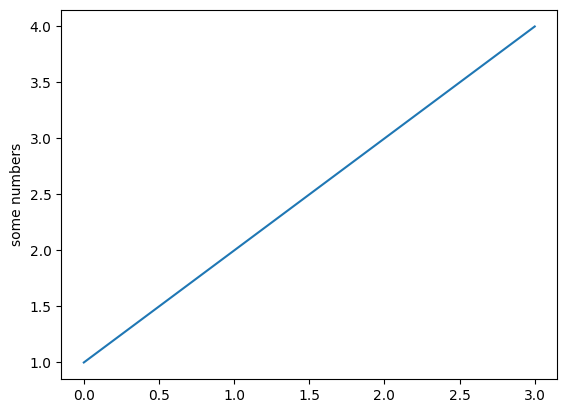

In [2]:
plt.plot([1, 2, 3, 4]) # if only 1 range is given, the plt will assume it is the y-axis and geneate the x-axis
plt.ylabel('some numbers')
plt.show()
# 

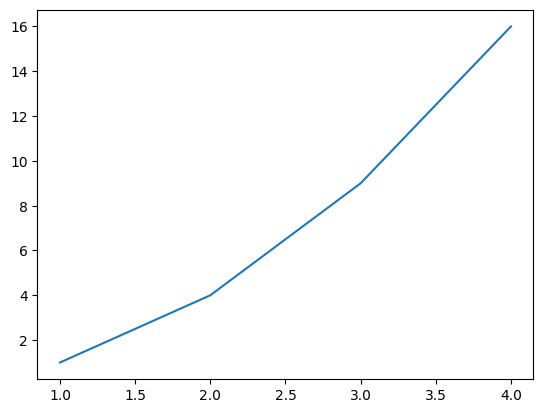

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
# if 2 inputs are given, then the first is x, the second is y
plt.show()


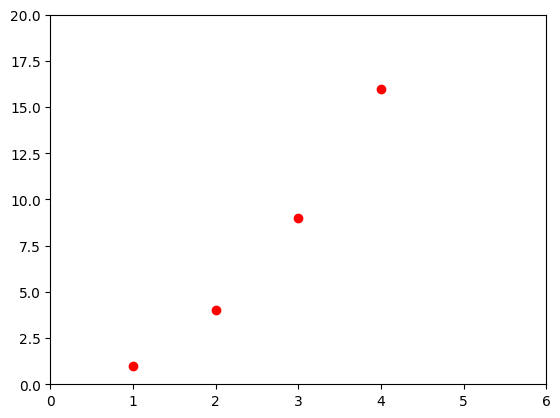

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro') # 3rd argument are letters and symbols of the format string are from MATLAB
plt.axis((0, 6, 0, 20)) # [xmin, xmax, ymin, ymax]
plt.show()

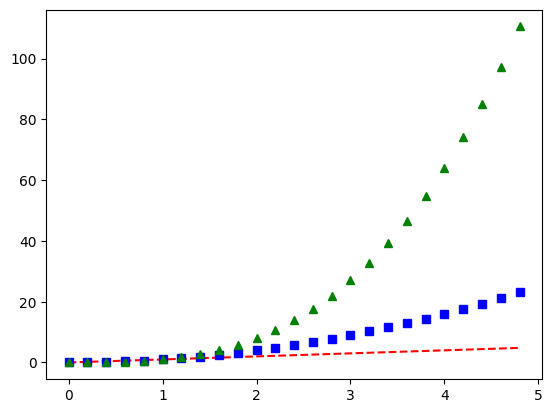

In [4]:
t = np.arange(0., 5., 0.2)
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^') #  In fact, all sequences are converted to numpy arrays internally
# plot can accept multiple (x, y, marker)
plt.show()

#### plotting with keyword strings
- There are some instances where you have data in a format that lets you access particular variables with strings. For example with structured arrays or pandas.DataFrame
- plt allows you to provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

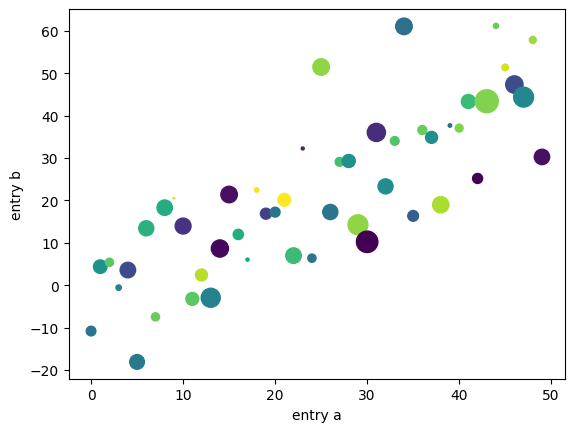

In [10]:
data = {
    'a': np.arange(50),
    'c': np.random.randint(0, 50, 50),
    'd': np.random.randn(50)
    }
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

#### plotting with categorical variables
- It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions.

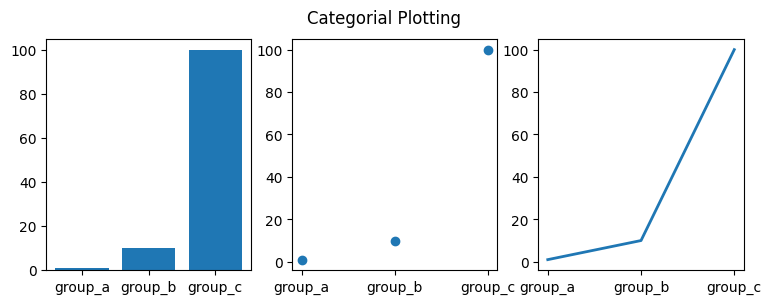

In [13]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131) # 1 column, 3 rows, and 1st graph
plt.bar(names, values)
plt.subplot(132) # 1 column, 3 rows, and 2nd graph
plt.scatter(names, values)
plt.subplot(133) # 1 column, 3 rows, and 3rd graph
plt.plot(names, values, linewidth=2.0)  # setting linewidth
plt.suptitle('Categorial Plotting')
plt.show()

#### Working with multiple figures and axes
- pyplot have the concept of current figure and the current axes. All plotting functions apply to the current Axes. The function gca() returns the current Axes (matplotlib.axes.Axes instance), and gcf() returns the current figure (a matplotlib.figure.Figure instance). Normally, you don't have to worry about this, because it is all taken care of behind the scences. Below is code to create two subplots.


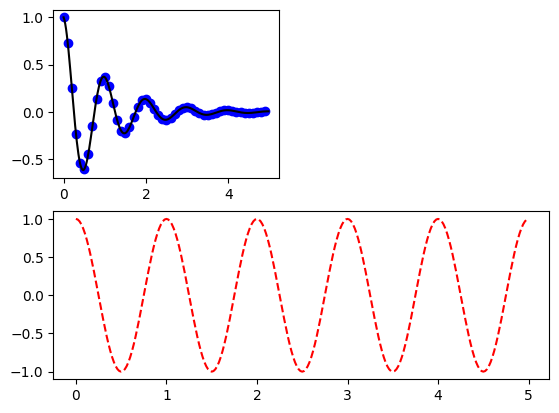

In [14]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure() # call here is optional because a figure will be created if none exists, 
# just as an Axes will be created (equivalent to an explicit subplot() call) if none exists.
plt.subplot(221) # specifies numrows, numcols, plot_number where plot_number ranges from 1 to numrow*numcols
# plt.subplot(221) identical to plt.subplot(2, 1, 1)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

- You can create an arbitrary number of subplots and Axes. If you want to place an Axes manually, i.e., not on a rectangular grid, use axes , which allows you to specify the location as axes([left, bottom, width, height]) where all values are in a fractional(0 to 1) coordinates.
- You can create multiple figures by using multiple figure calls with an increasing figure number. Of course, each figure can contain as many Axes and subplots as your heart desires.

Text(0.5, 1.0, 'Easy as 1, 2, 3')

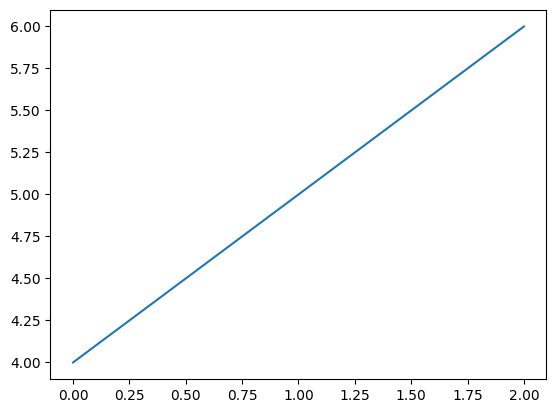

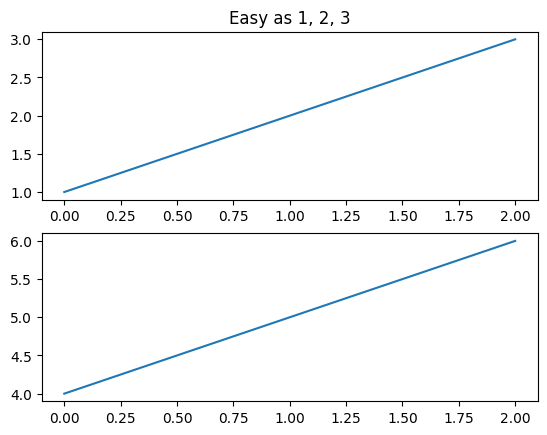

In [23]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot() by default

plt.figure(1)                # first figure current;
                             # subplot(212) still current
plt.subplot(211)             # make subplot(211) in the first figure
                             # current
plt.title('Easy as 1, 2, 3') # subplot 211 title

#### Working with text
- plt.text() can be used to add text in an arbitrary location and plt.xlabel, plt.ylabel, and plt.title are used to add text in the indicated locations

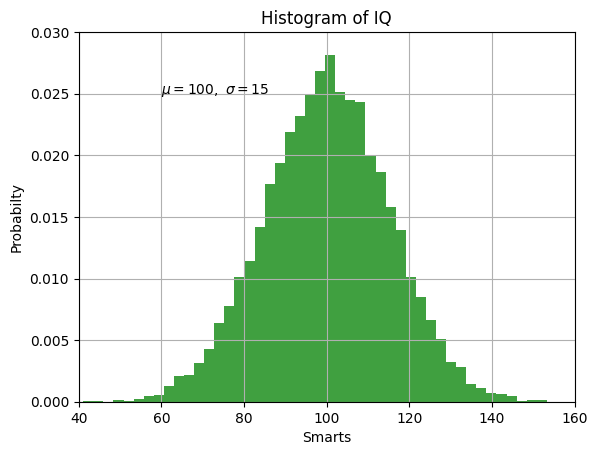

In [15]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='green', alpha=0.75)

plt.xlabel("Smarts")
plt.ylabel("Probabilty")
plt.title("Histogram of IQ")
plt.text(60, .025, r"$\mu=100, \ \sigma=15$") # place the text at x = 60 and y = 0.025
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

#### Using mathematical expressions in text
- plt accepts TeX equation expressions in any text expression. For example to write the expression 0i = 15 in the title, you can write a TeX expression surrounded by dollar signs:
```python
plt.title(r'$\sigma_i=15%')
```
- The r preceding the title string is important -- it signifies that the string is a raw string and not to treat backlashes as python escapes. Matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts. Thus, you can use mathematical text across platforms without requiring a TeX installation. For those who have LaTeX and dviping installed, you can also you LaTeX to format your text and incorporate the output directly into your display figures or saved postscript.

### Annotating Text
- The uses of the basic text function above place text at an arbitrary position on the Axes. A common use for text is to annotate some feature of the plot, and the annotate method provides  helper functionality to make annotation easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x, y) tuples.

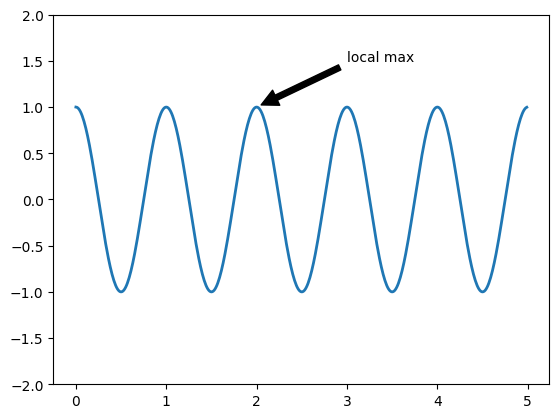

In [16]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# both xy (arrow tip) and xytext locations (text location) are in data coordinates.
# There are a variety of other coordinate systems one can choose.

plt.ylim(-2, 2)
plt.show()


### Logarithmic and other nonlinear axes
- matplotlib.pyplot supports not only linear axis scales, but also logarithmic and logit scales. This is commonly used if data spans many orders of magnitude. Change the scale of an axis is easy:
```python
plt.xscale('log')
```

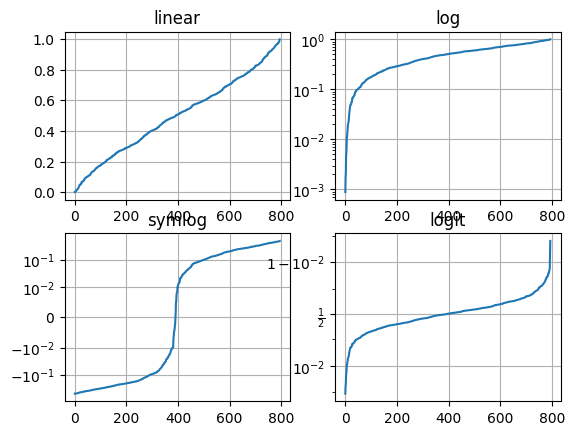

In [21]:
# Fixing random state for reproducibility
np.random.seed(42)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

# Adjust the subplot layout, because the logit one may take more space 
# than usual, due to y-tick labels like "1 -10^{-3}"
plt.show()

### Matplotlib quick guide

#### A simple example
- Matplotlib graphs your data in Figure(e.g., windows, Jupyter widgets, etc.), each of which can contain one or more Axes, an area where points can be specified in terms of x-y coordinates (or theta-r in a polor plot, x-y-z in 3D plot, etc.). The simplest way of creating a Figure with an Axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the Axes, and show to display the figure:

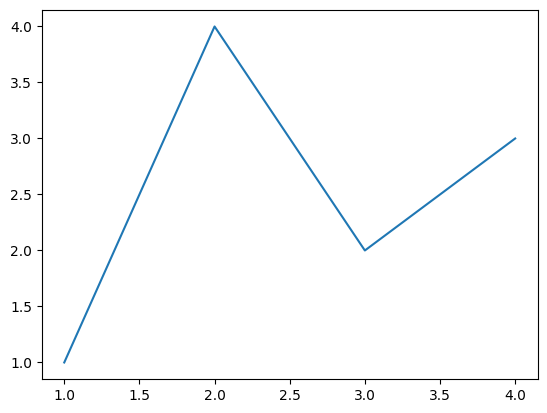

In [22]:
fig, ax = plt.subplots() # Create a figure containg a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]) # plot some data on the Axes.
plt.show() # show the figure

# Parts of a Figure

![Figure](plt_anatomy_of_figure.png)

### Figure
- The figure keeps track of all the child Axes, a group of "special" Artists (titles, figure, legends, colorbars, etc.), and even nested subfigures.

```python
fig = plt.figure() # an empty figure with no Axes
fig, ax = plt.subplots() # a figure with a single Axes
fig, ax = plt.subplots(2, 2) # a figure with a 2x2 grid of Axes
# figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([["left", "right_top"], ["left", "right_bottom"]])
```

### Axes
- An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label (set via set_ylabel()).
- The Axes methods are the primary interfce for configuring most parts of your plot (adding data, controlling axis scales and limits, adding labels etc.)

### Axis
- These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

### Artist
- Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text object, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to antoher.

### Types of input to plotting functions
- Plotting functions expect numpy.array or numpy.ma.masked_array as input, or objects that can be passed to numpy.asarray. Classed that are similar to arrays ("array-like") such as pandas data objects and numpy.matrix may not work as intended. Common convention is to convert these to numpy.array objects prior to plotting. For example, to convert a numpy.matrix
```python
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
```
- Most methods will also parse a string-indexable object like a dict, a structured numpy array, or a pandas.DataFrame. Matplotlib allows you to provide the data keyword argument and generate plots passing the strings corresponding to the x and y variables.

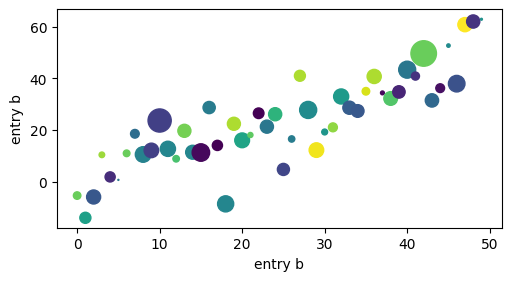

In [28]:
np.random.seed(42)
data = {
    "a": np.arange(50),
    "c": np.random.randint(0, 50, 50),
    "d": np.random.randn(50)
}

data["b"] = data["a"] + 10 * np.random.randn(50)
data["d"] = np.abs(data["d"]) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
ax.scatter("a", "b", c="c", s="d", data=data) # c the marker color
# s = The marker size
ax.set_xlabel("entry b")
ax.set_ylabel("entry b")
plt.show()

### Coding styles
#### The explicit and implicit interfaces
- As noted above, there are essentially two ways to use Matplotlib:
    - Explicitly create Figures and Axes, cand call methods on them (the "objected-oriented (OO) style").
    - Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting
    

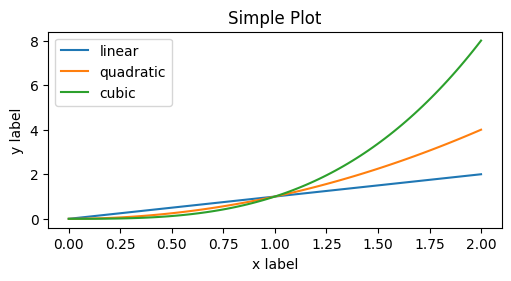

In [32]:
# OO-style
# ax use set_*() function 
x = np.linspace(0, 2, 100) # sample data 100 with values between 0-2

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
ax.plot(x, x, label="linear") # plot some data on the Axes
ax.plot(x, x**2, label="quadratic") # plot more data on the Axes...
ax.plot(x, x**3, label="cubic") # and more
ax.set_xlabel("x label") # Add an x-label to the Axes.
ax.set_ylabel("y label") # Add a y-label to the Axes.
ax.set_title("Simple Plot") # Add a title to the Axes
ax.legend() # Add a legend

plt.show() # flush it all out and show the graph

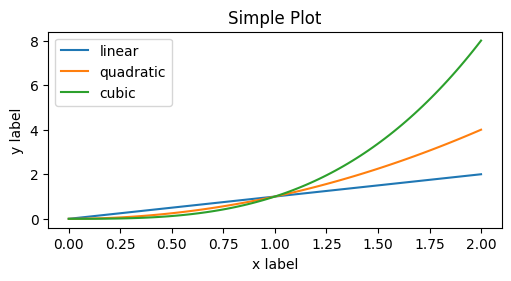

In [34]:
# pyplot-style
# there is no set_*() function, just the name itself
# plt - just call the name function 
x = np.linspace(0, 2, 100) # sample data

plt.figure(figsize=(5, 2.7), layout="constrained")
plt.plot(x, x, label="linear") # plot some data on the Axes
plt.plot(x, x**2, label="quadratic") # plot more data on the Axes...
plt.plot(x, x**3, label="cubic") # and more
plt.xlabel("x label") # Add an x-label to the Axes.
plt.ylabel("y label") # Add a y-label to the Axes.
plt.title("Simple Plot") # Add a title to the Axes
plt.legend() # Add a legend

plt.show()

### Making a helpher functions
- If you need to make plots over and over again with different data sets, or want to easily wrap Matplotlib methods, use the recommended signature function below.

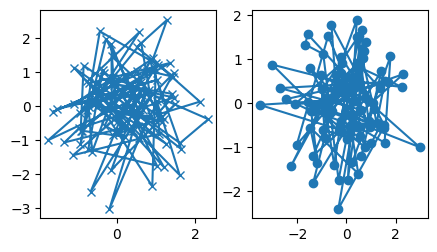

In [48]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4, 100) # 4 random set of 1000 numbers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, { "marker": "x"})
my_plotter(ax2, data3, data4, { "marker": "o"})
plt.show()

#### Styling Artists
- Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist. In the plot below we manually set the color, linewidth, and linestyle of the Artists created by plot, and we set the linestyle of the second line after the fact with set_linestyle.

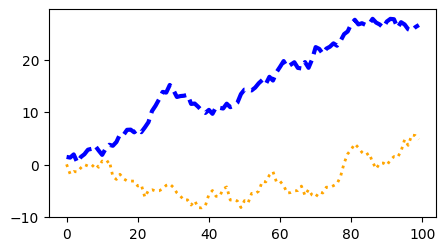

In [49]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color="blue", linewidth=3, linestyle="--") # returns nothing
l, = ax.plot(x, np.cumsum(data2), color="orange", linewidth=2) # returns list of Line2D: A list of lines representing the plotted data.
l.set_linestyle(":")
plt.show()

#### Colors
- Matplotlib has a very flexible array of colors that are accepted for most Artists. Some Artists will take multiple colors. i.e. for a scatter plot, the edge of the markers can be different colors from the interior:

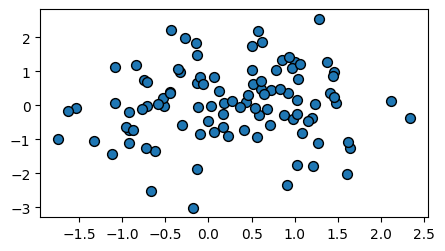

In [50]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor="C0", edgecolor="k")
plt.show()

#### Linewidths, linestyles, and markersizes
- Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle.
- Marker size depends on the method being used. The plot() function specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes.

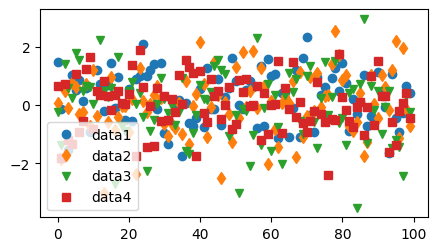

In [54]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, "o", label="data1")
ax.plot(data2, "d", label="data2")
ax.plot(data3, "v", label="data3")
ax.plot(data4, "s", label="data4")
ax.legend()
plt.show()

#### Labeling plots
- Axes label and text
    - set_xlabel, set_ylabel, and set_title are used to add text in the indicated locations. Text can also be directly added to plots using text() function.

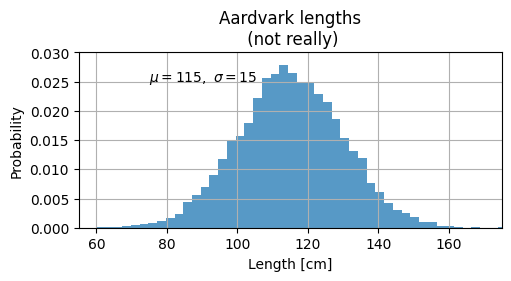

In [55]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor="C0", alpha=0.75)

ax.set_xlabel("Length [cm]")
ax.set_ylabel("Probability")
ax.set_title("Aardvark lengths\n (not really)")
ax.text(75, .025, r"$\mu=115,\ \sigma=15$")
ax.axis([55, 175, 0, 0.03])
ax.grid(True)
plt.show()

# All of the text() functions return a matplotlib.text.Text instance. Just as with lines above, you can customize the properties by passing keyword arguments into the text functions:
# t = ax.set_xlabel("my data", fontsize=14, color="red")

#### Using mathematical expressions in text
- Matplotlib accepts TeX equation expreions in any text expressions. For example to write Oi = 15 in the title, you can write a TeX expression surrounded by dollar signs:
```python
ax.set_title(r"$\sigma_i=15%")
```
where the r preciding the title using signifies that the string is a raw string and not to treat backlashes as python escapes. Matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts. You can also use LaTeX directly to format your text and incorporate the output directly into your display figures or saved postscript.

# Annotations
- We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at xytext

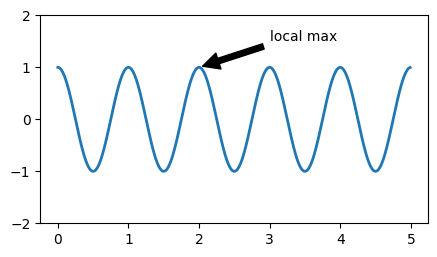

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)
# both xy and xytext are in data coordinates.
# There are a variety of other coordinate system one can choose.
ax.annotate("local max", xy=(2, 1), xytext=(3, 1.5), 
    arrowprops=dict(facecolor="black", shrink=0.05))
ax.set_ylim(-2, 2)
plt.show()

#### Legends
- Often we want to identify lines or markers with a Axes.legend
- Legends in Matplotlib are quite flexible in layout, placement, and what Artists they can represent.

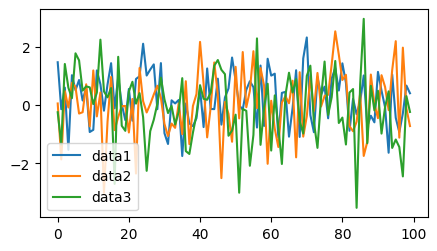

In [58]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label="data1")
ax.plot(np.arange(len(data2)), data2, label="data2")
ax.plot(np.arange(len(data3)), data3, label="data3")
ax.legend()

plt.show()

#### Axis scales and ticks
- Each Axes has two (or three) Axis objects representing the x- and y-axis. THese control the scale of the Axis, the tick locators and the tick formatters. Additional Axes can be attached to display further Axis objects.

#### Scales
- In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like loglog(), semilogx(), and semilogy(). There are a number of scales.

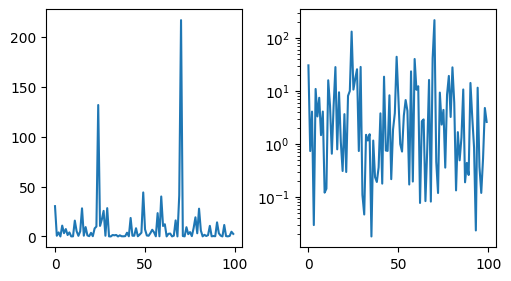

In [ ]:
fix, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout="constrained")
xdata = np.arange(len(data1)) # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

# The scale sets the mapping from data values to spacing along the Axis. This happens in both directions, and
# gets combined into a transform, which is the way that Matplotlib maps from data coordinates to Axes.
axs[1].set_yscale("log")
axs[1].plot(xdata, data)
plt.show()

#### Tick locators and formatters
- Each Axis has a tick locator and formatters that choose where along the Axis objects to put tick marks. A simple interface to this is set_xticks().

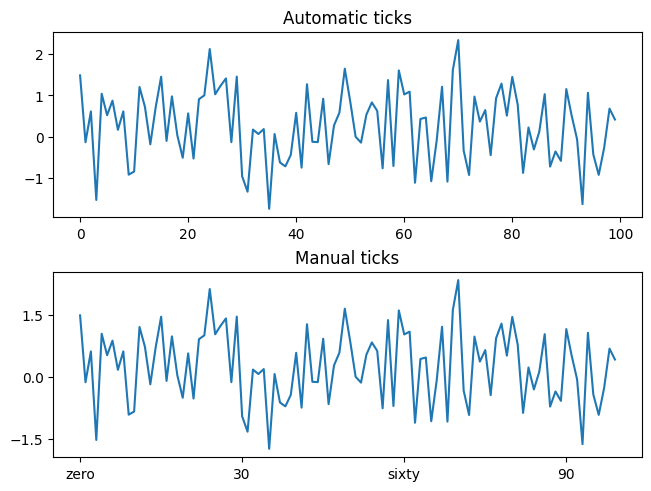

In [61]:
fix, axs = plt.subplots(2, 1, layout="constrained")
axs[0].plot(xdata, data1)
axs[0].set_title("Automatic ticks")

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ["zero", "30", "sixty", "90"])
axs[1].set_yticks([-1.5, 0, 1.5]) # note that we don't need to specify labels
axs[1].set_title("Manual ticks")

plt.show()

- Different scales can have different locators and formatters; for instance the log-scale above uses matplotlib.ticker.LogLocator() and matplotlib.ticker.LogFormatter()

#### Plotting dates and strings
- Matplotlib can handle plotting arrays of dates and arrays of strings, as well as floating point numbers. These get special locators and formatters as appropriate.

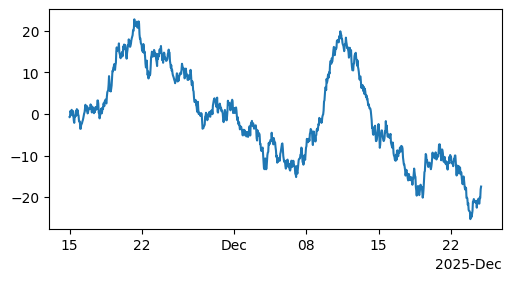

In [62]:
from matplotlib.dates import ConciseDateFormatter

fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
dates = np.arange(np.datetime64("2025-11-15"), np.datetime64("2025-12-25"),
        np.timedelta64(1, "h"))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

plt.show()

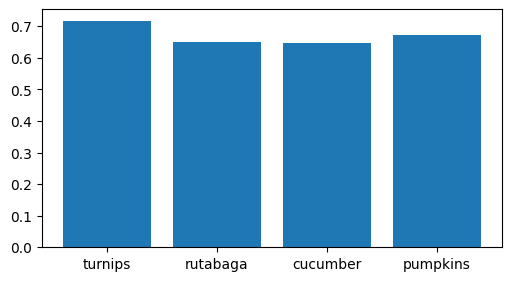

In [63]:
# For strings, there are categorical plotting
fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
categories = ["turnips", "rutabaga", "cucumber", "pumpkins"]
ax.bar(categories, np.random.rand(len(categories)))
plt.show()

- One caveat about categorical plotting is that some methods of parsing text files return a list of strings, even if the strings all represent numbers or dates. If you pass 1000 strings, Matplotlib will think you meant 1000 categories and will add 1000 ticks to your plot.

#### Additional Axis Objects
- Plotting data or different magnitude in one chart may require an additional y-axis. Such an Axis can be created by using Axes.twinx() function to add a new Axes with an invisible x-axis and a y-axis positioned at the right (analogously for Axes.twiny()).
- Similarly, you can add a secondary_xaxis or secondary_yaxis having a different scale than the main Axis to represent the data in different scales or units.

C:\Users\thotc\AppData\Local\Temp\ipykernel_15224\3670986716.py:5: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax2.legend(handles=[l1, l2], labels=["sine (left)", "Straight (right)"])


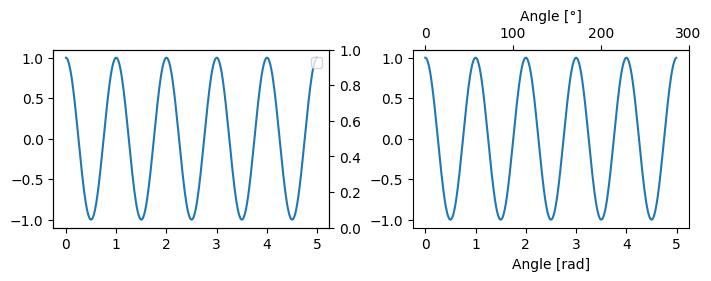

In [68]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout="constrained")
l1 = ax1.plot(t, s)
ax2 = ax1.twinx()
l2 = ax.plot(t, range(len(t)), "C1")
ax2.legend(handles=[l1, l2], labels=["sine (left)", "Straight (right)"])

ax3.plot(t, s)
ax3.set_xlabel("Angle [rad]")
ax4 = ax3.secondary_xaxis("top", (np.rad2deg, np.deg2rad))
ax4.set_xlabel("Angle [°]")

plt.show()

#### Color mapped data
- Often we want to have a third dimension in a plot represented by colors in a colormap. Matplotlib has a number of plot types that do this:

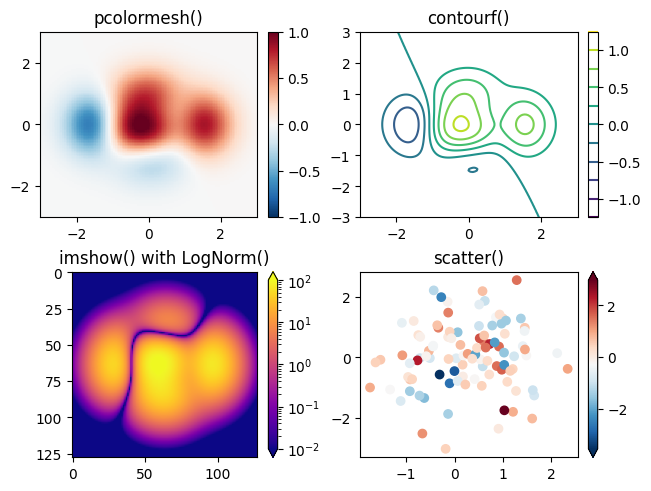

In [ ]:
from matplotlib.colors import LogNorm

X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout="constrained")
# Figure 1: pcolormesh
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap="RdBu_r")
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title("pcolormesh()")

# Figure 2: contourf
co = axs[0, 1].contour(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title("contourf()")

# Figure 3: colorbar
pc = axs[1, 0].imshow(Z**2 * 100, cmap="plasma", norm=LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend="both")
axs[1, 0].set_title("imshow() with LogNorm()")

# Figure 4: scatter
pc = axs[1, 1].scatter(data1, data2, c=data3, cmap="RdBu_r")
fig.colorbar(pc, ax=axs[1, 1], extend="both")
axs[1, 1].set_title("scatter()")

plt.show()

#### Colormaps
- These are all examples of Artists that derive from ScalarMappable objects. They all can set a linear mapping between vmin and vmax into the colormap specified by cmap. Matplotlib has many colormaps to choose from. 

#### Normalizations
- Sometimes we want a non-linear mapping of the data to the colormap, as in the LogNorm example above. We do this by supplying the ScalarMappable with the norm argument instead of vmin and vmax.

#### Colorbars
- Adding a colorbar gives a key to relate the color back to the underlying data. Colorbars are figure-level Artists, and are attached to a ScalarMappable (where they get their information about the norm and colormap) and usually steal space from a parent Axes. Placement of colorbars can be complex. You can also change the appearance of colorbars with the extend keyword to add arrows to the ends, and shrink and aspect to control the size. Finally, the colorbar will have default locators and formatters appropriate to the norm. These can be changed as for other Axis objects.

#### Working with multiple Figures and Axes
- You can open multiple Figures with multiple calls to:
```python
fig = plt.figure or fig2, ax = plt.subplots().
```
By keeping the object references, you can add Artists to either Figure.
- Multiple Axes can be added a number of ways, but the most basic is plt.subplots() as used above. One can achieve more complex layouts, with Axes objects spanning columns or rows, using suplot_mosaic() function.

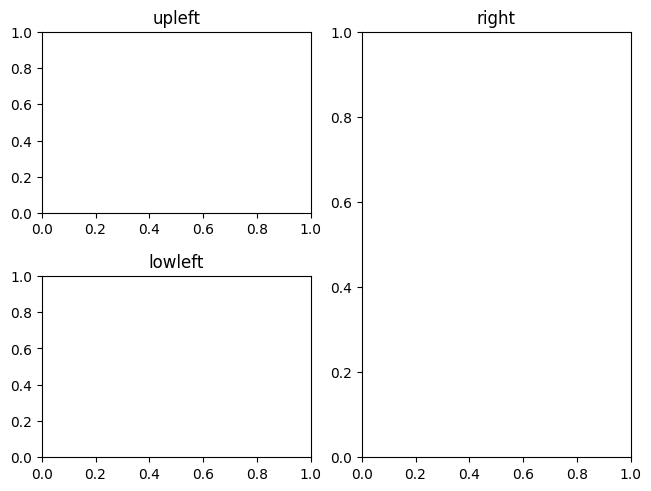

In [ ]:
# Create a 3 graph figure with 2 on the left column and 1 on the right column
fig, axd = plt.subplot_mosaic([["upleft", "right"], ["lowleft", "right"]], layout="constrained")

axd["upleft"].set_title("upleft")
axd["lowleft"].set_title("lowleft")
axd["right"].set_title("right")
plt.show()